Planning
- listing rank of the best stock and chosen them
- create a first solution faster
- Issues correction "error with extraction"

# 1.0 - Packages

## 1.1 - Libraries

In [83]:
# data manipulation
import pandas as pd
from datetime import datetime

# API to get finances data
import pandas_finance as pdf
import yfinance as yf
import pandas_datareader as pdr
import investpy as inv

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# jupyter viewer
from IPython.core.display import display, HTML

## 1.2 - Helper Functions

In [29]:
def jupyter_settings():
    # mostrar o gráfico na célula
    %matplotlib inline
    %pylab inline	
    # tamanho dos gráficos para o matplotlib
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 20
    # colocando para aparecer todas as colunas e linhas
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    # expandir a visualização da tela em 100%, como se fosse um zoom
    display(HTML('<style>.conteiner{width:100% !important;}</style>'))

    #aplicar as mesmas configurações no seaborn
    sns.set()

jupyter_settings()

raw_path = '/home/diegopmayer/Documents/projects/ideias/analise-acoes/notebooks/dataset/raw'

# function to gett all the stocks from api
def get_all_stocks(symbol:str, country:str, from_date:str, to_date:str):
    stock_financial_summary = inv.get_stock_financial_summary(symbol, country=country)
    stock_historical_data = inv.stocks.get_stock_historical_data(stock=symbol, 
                            country=country, from_date=from_date, to_date=to_date)
    
    # concatenating the historical data and symbol
    stock_historical_data.loc[:, 'symbol'] = symbol
    
    return stock_historical_data

Populating the interactive namespace from numpy and matplotlib


/home/diegopmayer/Documents/projects/ideias/analise-acoes/venv_analise_acoes/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['datetime', 'inv']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# 2.0 - ELT - Extraction Load and Transformation

- Steps:
    - [x] Find the APIs that we can use from
        - investy + yfinance + pandas_datareader
    - [x] Get a list of symbols per country
    - [x] Get a simple historical data values from country list
    - [ ] Get a ranking of best stock to predict a close price
        - [ ] Anual moving average of growth percentual
    - [ ] Loading data to cloud

## 2.1 - Extraction

### 2.1.1 - Taking a look at all APIs

- pandas_finance: didn't run
- yfinance: first
- pandas: didn't run
- pandas_datareader: second 
- investpy: better until now

In [179]:
# yfinance
pd.DataFrame([yf.Ticker('msft').info])

,zip,sector,fullTimeEmployees,longBusinessSummary,city,phone,state,country,companyOfficers,website,maxAge,address1,industry,ebitdaMargins,profitMargins,grossMargins,operatingCashflow,revenueGrowth,operatingMargins,ebitda,targetLowPrice,recommendationKey,grossProfits,freeCashflow,targetMedianPrice,currentPrice,earningsGrowth,currentRatio,returnOnAssets,numberOfAnalystOpinions,targetMeanPrice,debtToEquity,returnOnEquity,targetHighPrice,totalCash,totalDebt,totalRevenue,totalCashPerShare,financialCurrency,revenuePerShare,quickRatio,recommendationMean,exchange,shortName,longName,exchangeTimezoneName,exchangeTimezoneShortName,isEsgPopulated,gmtOffSetMilliseconds,quoteType,symbol,messageBoardId,market,annualHoldingsTurnover,enterpriseToRevenue,beta3Year,enterpriseToEbitda,52WeekChange,morningStarRiskRating,forwardEps,revenueQuarterlyGrowth,sharesOutstanding,fundInceptionDate,annualReportExpenseRatio,totalAssets,bookValue,sharesShort,sharesPercentSharesOut,fundFamily,lastFiscalYearEnd,heldPercentInstitutions,netIncomeToCommon,trailingEps,lastDividendValue,SandP52WeekChange,priceToBook,heldPercentInsiders,nextFiscalYearEnd,yield,mostRecentQuarter,shortRatio,sharesShortPreviousMonthDate,floatShares,beta,enterpriseValue,priceHint,threeYearAverageReturn,lastSplitDate,lastSplitFactor,legalType,lastDividendDate,morningStarOverallRating,earningsQuarterlyGrowth,priceToSalesTrailing12Months,dateShortInterest,pegRatio,ytdReturn,forwardPE,lastCapGain,shortPercentOfFloat,sharesShortPriorMonth,impliedSharesOutstanding,category,fiveYearAverageReturn,previousClose,regularMarketOpen,twoHundredDayAverage,trailingAnnualDividendYield,payoutRatio,volume24Hr,regularMarketDayHigh,navPrice,averageDailyVolume10Day,regularMarketPreviousClose,fiftyDayAverage,trailingAnnualDividendRate,open,toCurrency,averageVolume10days,expireDate,algorithm,dividendRate,exDividendDate,circulatingSupply,startDate,regularMarketDayLow,currency,trailingPE,regularMarketVolume,lastMarket,maxSupply,openInterest,marketCap,volumeAllCurrencies,strikePrice,averageVolume,dayLow,ask,askSize,volume,fiftyTwoWeekHigh,fromCurrency,fiveYearAvgDividendYield,fiftyTwoWeekLow,bid,tradeable,dividendYield,bidSize,dayHigh,regularMarketPrice,logo_url
0,98052-6399,Technology,163000,"Microsoft Corporation develops, licenses, and ...",Redmond,425 882 8080,WA,United States,[],http://www.microsoft.com,1,One Microsoft Way,Software—Infrastructure,0.47245,0.35016,0.68381,72703000576,0.191,0.4015,75577999360,256.7,buy,96937000000,37776875520,300,276.39,0.45,2.294,0.13508,33,298.92,60.414,0.44991,340,125013000192,81260003328,159969001472,16.599,USD,21.156,2.096,1.6,NMS,Microsoft Corporation,Microsoft Corporation,America/New_York,EDT,False,-14400000,EQUITY,MSFT,finmb_21835,us_market,None,12.906,None,27.317,0.306131,None,8.37,None,7531570176,None,None,None,17.853,48137624,0.0064,None,1593475200,0.72033,56014999552,7.338,0.56,0.382634,15.481432,0.00072,1656547200,None,1617148800,2.24,1620950400,7420483826,0.787812,2064560685056,2,None,1045526400,2:1,None,1621382400,None,0.438,13.012838,1623715200,2.07,None,33.021507,None,0.0064,40526093,None,None,None,279.93,276.9,243.06728,0.007823,0.2916,None,278.7282,None,22738485,279.93,258.61734,2.19,276.9,None,22738485,None,None,2.24,1629244800,None,None,274.87,USD,37.66558,9910918,None,None,None,2081650769920,None,None,24720690,274.87,275.46,900,9910918,280.69,None,1.57,196.25,275.45,False,0.008,900,278.7282,276.39,https://logo.clearbit.com/microsoft.com


In [178]:
# There are some columns to concateneted with yfinance
pdr.get_quote_yahoo('msft')

,language,region,quoteType,quoteSourceName,triggerable,currency,shortName,exchange,longName,messageBoardId,exchangeTimezoneName,exchangeTimezoneShortName,gmtOffSetMilliseconds,market,esgPopulated,firstTradeDateMilliseconds,priceHint,regularMarketChange,regularMarketChangePercent,regularMarketTime,regularMarketPrice,regularMarketDayHigh,regularMarketDayRange,regularMarketDayLow,regularMarketVolume,bid,regularMarketPreviousClose,ask,bidSize,askSize,fullExchangeName,financialCurrency,regularMarketOpen,averageDailyVolume3Month,averageDailyVolume10Day,fiftyTwoWeekLowChange,fiftyTwoWeekLowChangePercent,fiftyTwoWeekRange,fiftyTwoWeekHighChange,fiftyTwoWeekHighChangePercent,fiftyTwoWeekLow,fiftyTwoWeekHigh,dividendDate,earningsTimestamp,earningsTimestampStart,earningsTimestampEnd,trailingAnnualDividendRate,trailingPE,trailingAnnualDividendYield,epsTrailingTwelveMonths,epsForward,epsCurrentYear,priceEpsCurrentYear,sharesOutstanding,bookValue,fiftyDayAverage,fiftyDayAverageChange,fiftyDayAverageChangePercent,twoHundredDayAverage,marketCap,marketState,twoHundredDayAverageChange,twoHundredDayAverageChangePercent,forwardPE,priceToBook,sourceInterval,exchangeDataDelayedBy,averageAnalystRating,tradeable,displayName,price
MSFT,en-US,US,EQUITY,Nasdaq Real Time Price,True,USD,Microsoft Corporation,NMS,Microsoft Corporation,finmb_21835,America/New_York,EDT,-14400000,us_market,False,511108200000,2,-3.544006,-1.266033,1625757633,276.386,278.7282,274.87 - 278.7282,274.87,9896981,275.45,279.93,275.46,9,9,NasdaqGS,USD,276.9,24720690,22738485,80.13599,0.408336,196.25 - 280.69,-4.304016,-0.015334,196.25,280.69,1631145600,1627383540,1627383540,1627383540,2.19,37.66503,0.007823,7.338,8.37,7.77,35.57091,7531570176,17.853,258.61734,17.768646,0.068706,243.06728,2081620492288,REGULAR,33.31871,0.137076,33.021027,15.481206,15,0,1.6 - Buy,False,Microsoft,276.386


In [123]:
# investpy

stocks_brazil = inv.get_stocks_list(country='brazil')
historical_stock_brazil = inv.get_stock_historical_data(stock=stocks_brazil[0], country='brazil', from_date='01/01/1990', to_date='08/07/2021')

In [126]:
inv.get_stocks_overview('brazil').head()

,country,name,symbol,last,high,low,change,change_percentage,turnover,currency
0,brazil,ABC BRASIL PN,ABCB4,15.24,15.31,14.89,+0.07,+0.46%,873000,BRL
1,brazil,BRASILAGRO ON,AGRO3,30.40,30.48,29.59,+0.31,+1.03%,515799,BRL
2,brazil,RUMO ON NM,RAIL3,20.27,20.39,19.55,+0.91,+4.70%,11400000,BRL
3,brazil,ALPARGATAS ON,ALPA3,46.61,46.73,44.70,+1.16,+2.55%,6700,BRL
4,brazil,ALPARGATAS PN,ALPA4,53.40,53.97,52.63,+0.73,+1.39%,1690000,BRL


### 2.1.2 - Execution

In [195]:
# creating a fixed from_date and end_date 
day = str(datetime.today().date().day)
month = str(datetime.today().date().month)
year = str(datetime.today().date().year)
to_date = day + '/' + month + '/' + year # getting day equal today
from_date = '01/01/1995'                 # getting  1990 as from

In [196]:
# Get a list of symbols of stocks and funds per country
stocks_brazil = inv.get_stocks_list(country='brazil')
funds_brazil = inv.get_funds_list(country='brazil')
print(f'{len(stocks_brazil)} Stocks listed in brazil')
print(f'{len(funds_brazil)} Funds listed in brazil')

749 Stocks listed in brazil
5200 Funds listed in brazil


In [ ]:
# getting description of all stocks and get the symbol 'only brazil'
stock_description = inv.get_stocks(country='brazil')
dataset = pd.DataFrame()
symbol_error = list()
# looping for extracting each symbol of brazil
for symbol_item in stock_description['symbol']:
    try:
        dataset = pd.concat([dataset, get_all_stocks(symbol=symbol_item, 
                                         country='brazil', 
                                         from_date='07/07/2021', 
                                         to_date=to_date)])
    except:
        # get errors list to see after why
        print(f"{symbol_item} couldn't get {raise}")
        symbol_error.append(symbol_item)
        continue

In [ ]:
# statistics about extraction
print(f'Lines: {dataset.shape[0]}/n Columns: {dataset[1]}')
print(f"Number of Stocks Collected: {dataset['symbol'].value_counts().count()}")
print(f"Number of Stocks errors: {len(symbol_error)}")
dataset.tail()

In [ ]:
# Testing errors
adhm3 = get_all_stocks(symbol='ADHM3', 
                     country='brazil', 
                     from_date='07/07/2021', 
                     to_date=to_date)

## 2.2 - Load

In [34]:
stock_historical_data.reset_index().to_feather(f'{raw_path}/dataset.ftr')

## 2.3 - Transforming

### 2.3.0 - Descriptive Analysis

In [35]:
dataset = pd.read_feather('dataset/raw/dataset.ftr')

### 2.3.1 - Shape and null

In [36]:
# Show the count of lines and columns
dataset.shape

(3404, 8)

In [37]:
# null 
dataset.isnull().sum()

Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
symbol      0
dtype: int64

### 2.3.2 - Data Type

In [39]:
# showing each column types of data 
dataset.dtypes

Date        datetime64[ns]
Open               float64
High               float64
Low                float64
Close              float64
Volume               int64
Currency            object
symbol              object
dtype: object

In [40]:
# showing the data to see if dypes is ok
dataset.tail()

,Date,Open,High,Low,Close,Volume,Currency,symbol
3399,2021-07-02,15.22,15.59,15.19,15.50,1848000,BRL,ABCB4
3400,2021-07-05,15.45,15.75,15.38,15.57,577000,BRL,ABCB4
3401,2021-07-06,15.57,15.58,15.08,15.17,755700,BRL,ABCB4
3402,2021-07-07,15.31,15.31,14.89,15.24,873000,BRL,ABCB4
3403,2021-07-08,15.02,15.11,14.90,15.10,664500,BRL,ABCB4


### 2.3.3 - Descriptive statistics

In [47]:
dataset.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Open,3404.0,9.54,4.53,1.29,6.27,8.07,13.86,22.73
High,3404.0,9.67,4.58,1.41,6.33,8.19,14.06,22.90
Low,3404.0,9.38,4.47,1.27,6.15,7.94,13.62,22.01
Close,3404.0,9.52,4.53,1.35,6.24,8.06,13.82,22.80
Volume,3404.0,373423.29,320572.66,672.00,164856.75,283255.00,474137.50,3314420.00


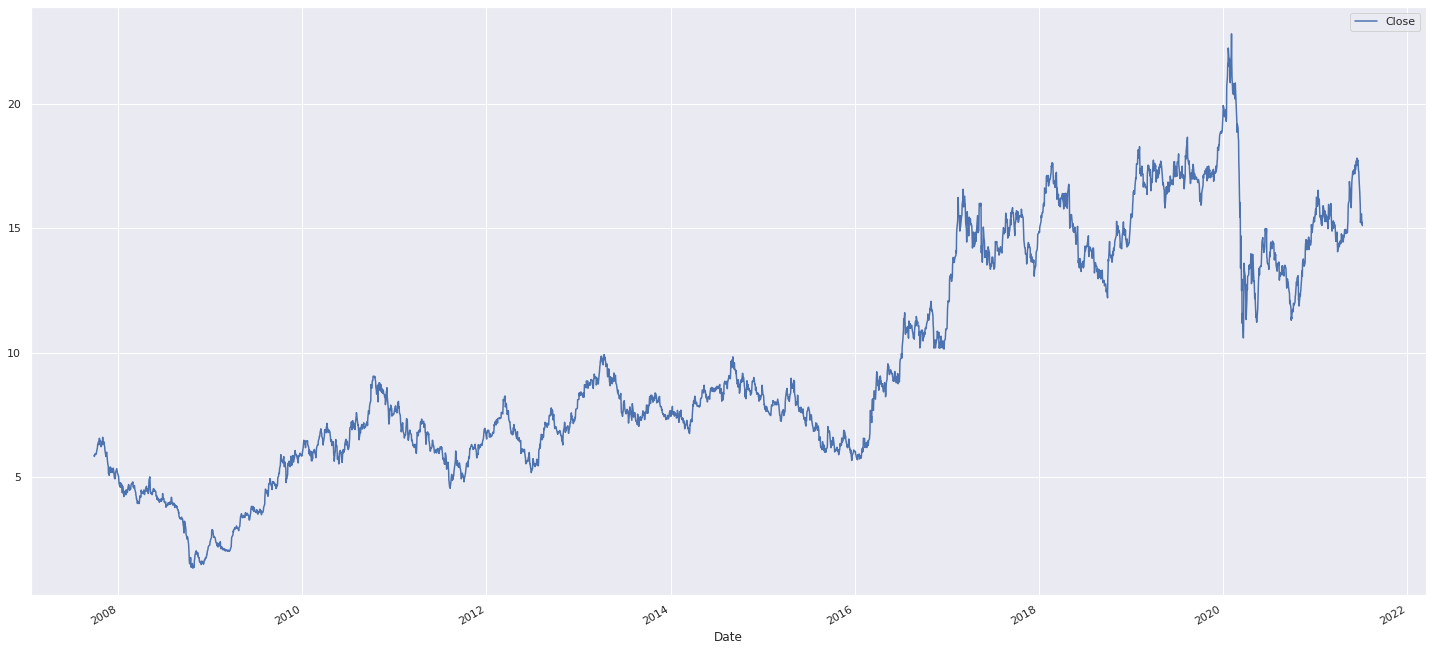

In [52]:
dataset.plot(x='Date', y='Close');

# 3.0 - Hypothesis Analysis

## 3.1 - Wich better moving average price

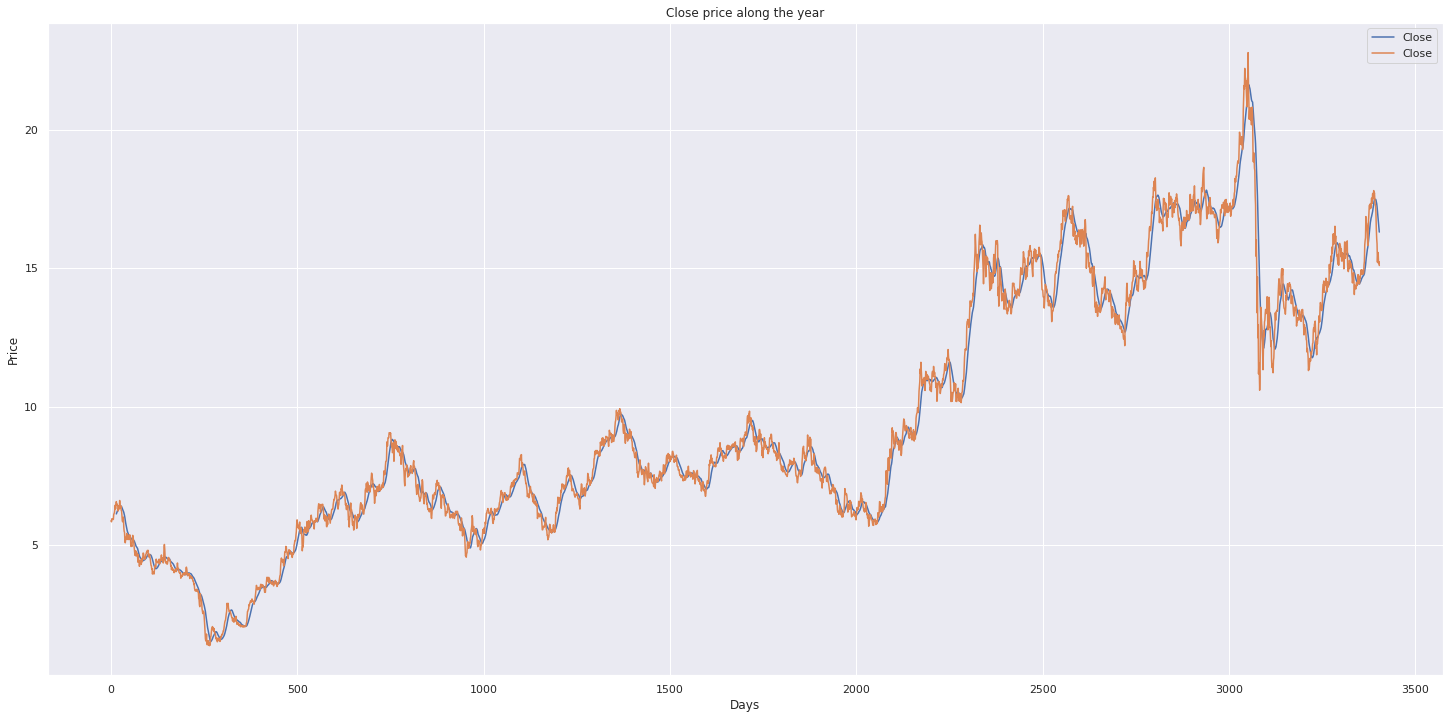

In [159]:
# moving average
plt.title('Close price along the year')
plt.xlabel('Days')
plt.ylabel('Price')
dataset['Close'].rolling(15).mean().plot()
dataset['Close'].plot();
plt.legend()
plt.show()

It's supposed to how more rigthest the standard deviation it's better to day trader 

In [164]:
# get the standard deviation
dataset['Close'].std()
# get a rank of all stocks sorting by hightest std.

4.526555914580484

It's supposed to how more growth tax per year it's better

In [192]:
dataset.groupby(by='year').mean().reset_index().round(2)['Close']

0      5.77
1      3.54
2      3.89
3      7.00
4      6.22
5      6.79
6      8.23
7      8.27
8      7.19
9      9.37
10    14.52
11    14.82
12    17.14
13    14.58
14    15.66
Name: Close, dtype: float64

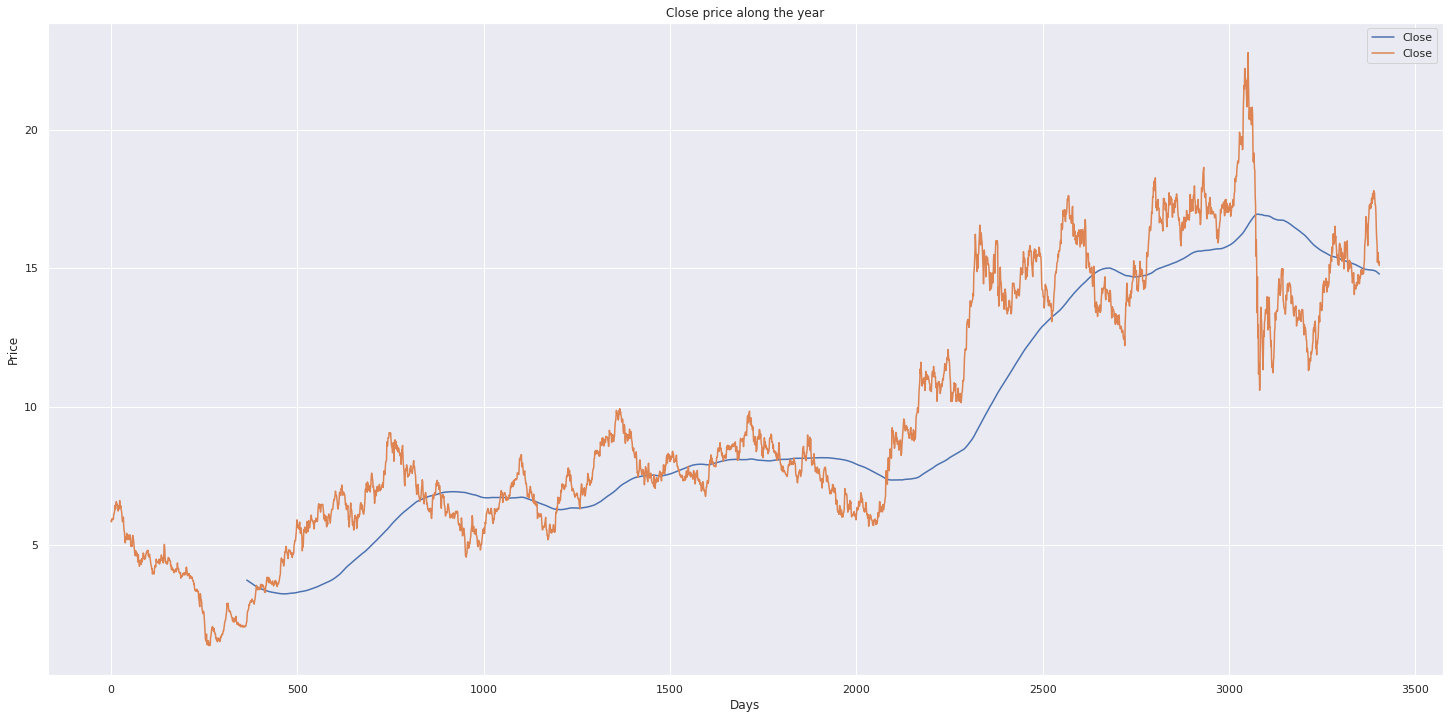

In [170]:
# moving average
plt.title('Close price along the year')
plt.xlabel('Days')
plt.ylabel('Price')
dataset['Close'].rolling(365).mean().plot()
dataset['Close'].plot();
plt.legend()
plt.show()

## 3.2 - Witch is hightest standard devition 

## 3.3 - What is the best growth per year